HR-Employee-Attrition.csv geadient,cat.light and XGBoost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR-Emploee-Attrition.csv to HR-Emploee-Attrition.csv


In [ ]:
df=pd.read_csv('HR-Emploee-Attrition.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Attrition']=le.fit_transform(df['Attrition'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['Over18']=le.fit_transform(df['Over18'])
df['OverTime']=le.fit_transform(df['OverTime'])

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('Attrition',axis=1)
y=df['Attrition']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.8324829931972789
0.8673469387755102


[Text(0.4602657004830918, 0.9705882352941176, 'x[21] <= 0.5\ngini = 0.28\nsamples = 1176\nvalue = [978, 198]'),
 Text(0.19577294685990337, 0.9117647058823529, 'x[27] <= 1.5\ngini = 0.182\nsamples = 837\nvalue = [752, 85]'),
 Text(0.32801932367149755, 0.9411764705882353, 'True  '),
 Text(0.04251207729468599, 0.8529411764705882, 'x[11] <= 58.5\ngini = 0.473\nsamples = 52\nvalue = [32, 20]'),
 Text(0.02318840579710145, 0.7941176470588235, 'x[28] <= 3.5\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.015458937198067632, 0.7352941176470589, 'x[1] <= 0.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.007729468599033816, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.02318840579710145, 0.6764705882352942, 'x[5] <= 2.5\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.015458937198067632, 0.6176470588235294, 'x[4] <= 4.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.007729468599033816, 0.5588235294117647, 'gini = 0.0\nsamples = 1\nvalue = [1, 

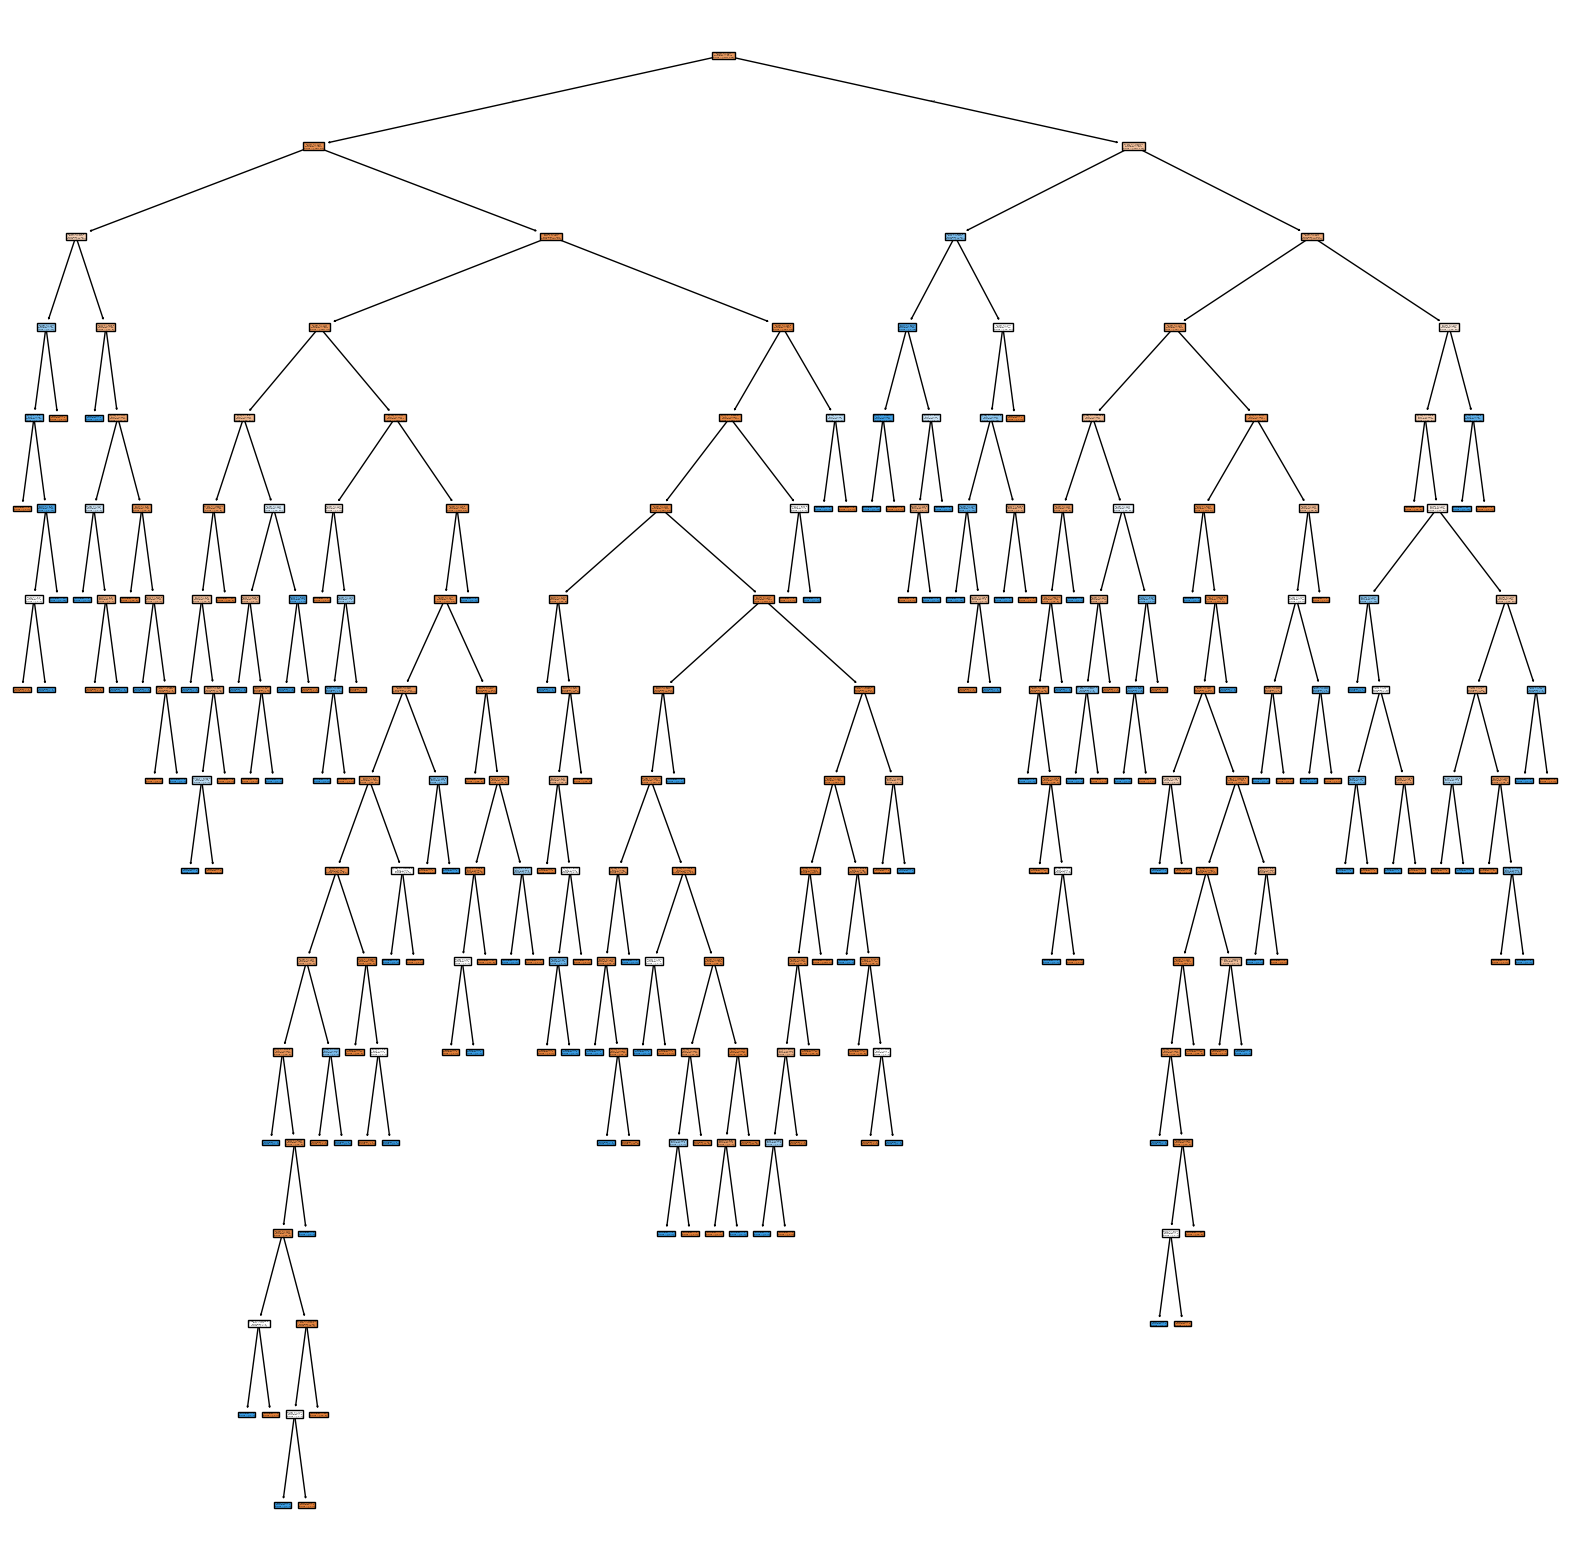

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

plt.figure(figsize=(20,20))
plot_tree(dt,filled=True)


<Axes: >

<Figure size 2000x2000 with 0 Axes>

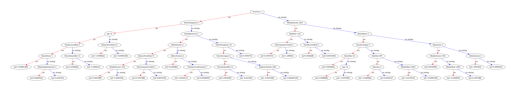

In [ ]:
import xgboost as xgb
from xgboost import plot_tree
xg=xgb.XGBClassifier()
xg.fit(x_train,y_train)

plt.figure(figsize=(20,20))
plot_tree(xg,filled=True)


[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1390
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168367 -> initscore=-1.597243
[LightGBM] [Info] Start training from score -1.597243


<Axes: >

<Figure size 1000x800 with 0 Axes>

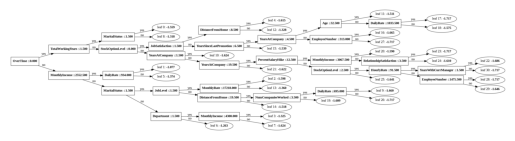

In [ ]:
import lightgbm as lgb
from lightgbm import plot_tree
lg=lgb.LGBMClassifier()
lg.fit(x_train,y_train)

plt.figure(figsize=(10,8))
plot_tree(lg)


Learning rate set to 0.011041
0:	learn: 0.6842011	total: 3.04ms	remaining: 3.04s
1:	learn: 0.6765855	total: 6.02ms	remaining: 3s
2:	learn: 0.6702016	total: 8.89ms	remaining: 2.95s
3:	learn: 0.6623329	total: 11.7ms	remaining: 2.92s
4:	learn: 0.6551527	total: 14.6ms	remaining: 2.91s
5:	learn: 0.6487255	total: 17.5ms	remaining: 2.89s
6:	learn: 0.6416158	total: 20.6ms	remaining: 2.92s
7:	learn: 0.6338888	total: 23.7ms	remaining: 2.94s
8:	learn: 0.6258161	total: 26.7ms	remaining: 2.94s
9:	learn: 0.6180758	total: 29.3ms	remaining: 2.9s
10:	learn: 0.6108570	total: 32.1ms	remaining: 2.88s
11:	learn: 0.6052706	total: 34.8ms	remaining: 2.86s
12:	learn: 0.5997294	total: 37.5ms	remaining: 2.85s
13:	learn: 0.5934327	total: 40.3ms	remaining: 2.84s
14:	learn: 0.5884247	total: 43.3ms	remaining: 2.84s
15:	learn: 0.5830865	total: 46.1ms	remaining: 2.83s
16:	learn: 0.5771818	total: 49ms	remaining: 2.83s
17:	learn: 0.5712274	total: 52ms	remaining: 2.84s
18:	learn: 0.5655112	total: 55ms	remaining: 2.84s
19

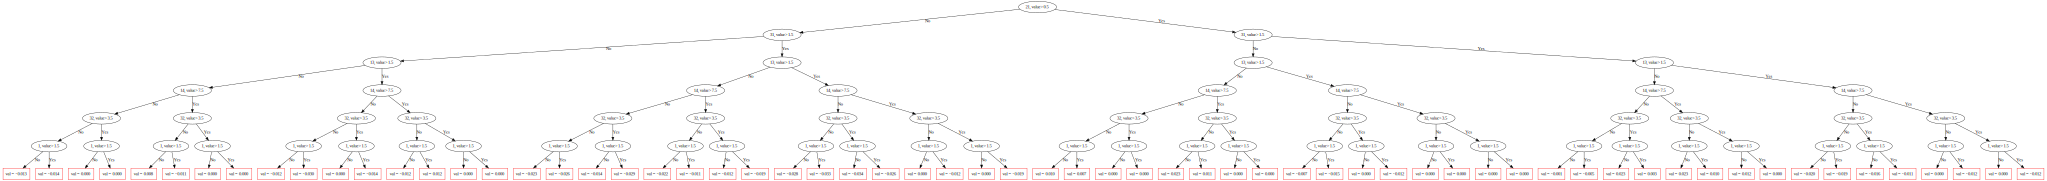

In [ ]:
!pip install catboost
import catboost as cb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

cat = cb.CatBoostClassifier()
cat.fit(x_train, y_train)
y_pred = cat.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Correct way to plot a tree from CatBoost
cat.plot_tree(tree_idx=0)

Accuracy: 0.8877551020408163


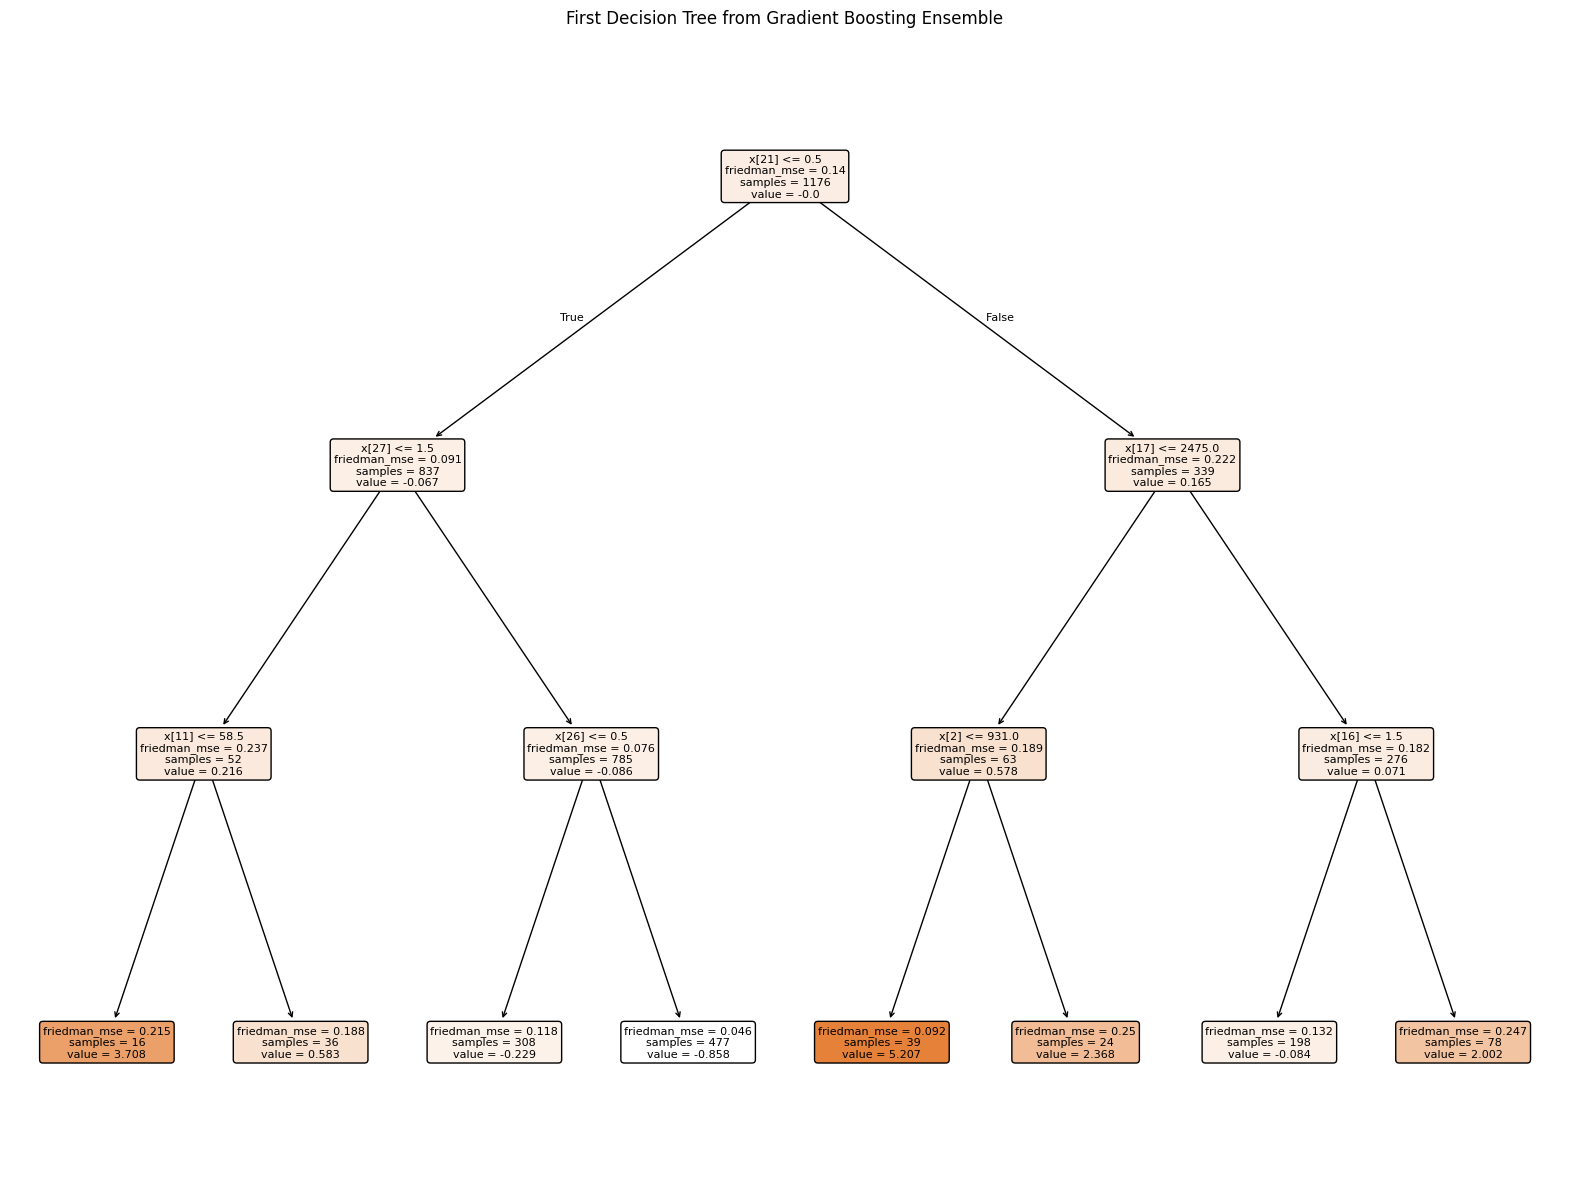

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # Explicitly import plot_tree

gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(20, 15)) # Increased figsize for better visibility
plot_tree(gb_model.estimators_[0, 0], filled=True, rounded=True, fontsize=8)
plt.title("First Decision Tree from Gradient Boosting Ensemble")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # Explicitly import plot_tree

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8741496598639455


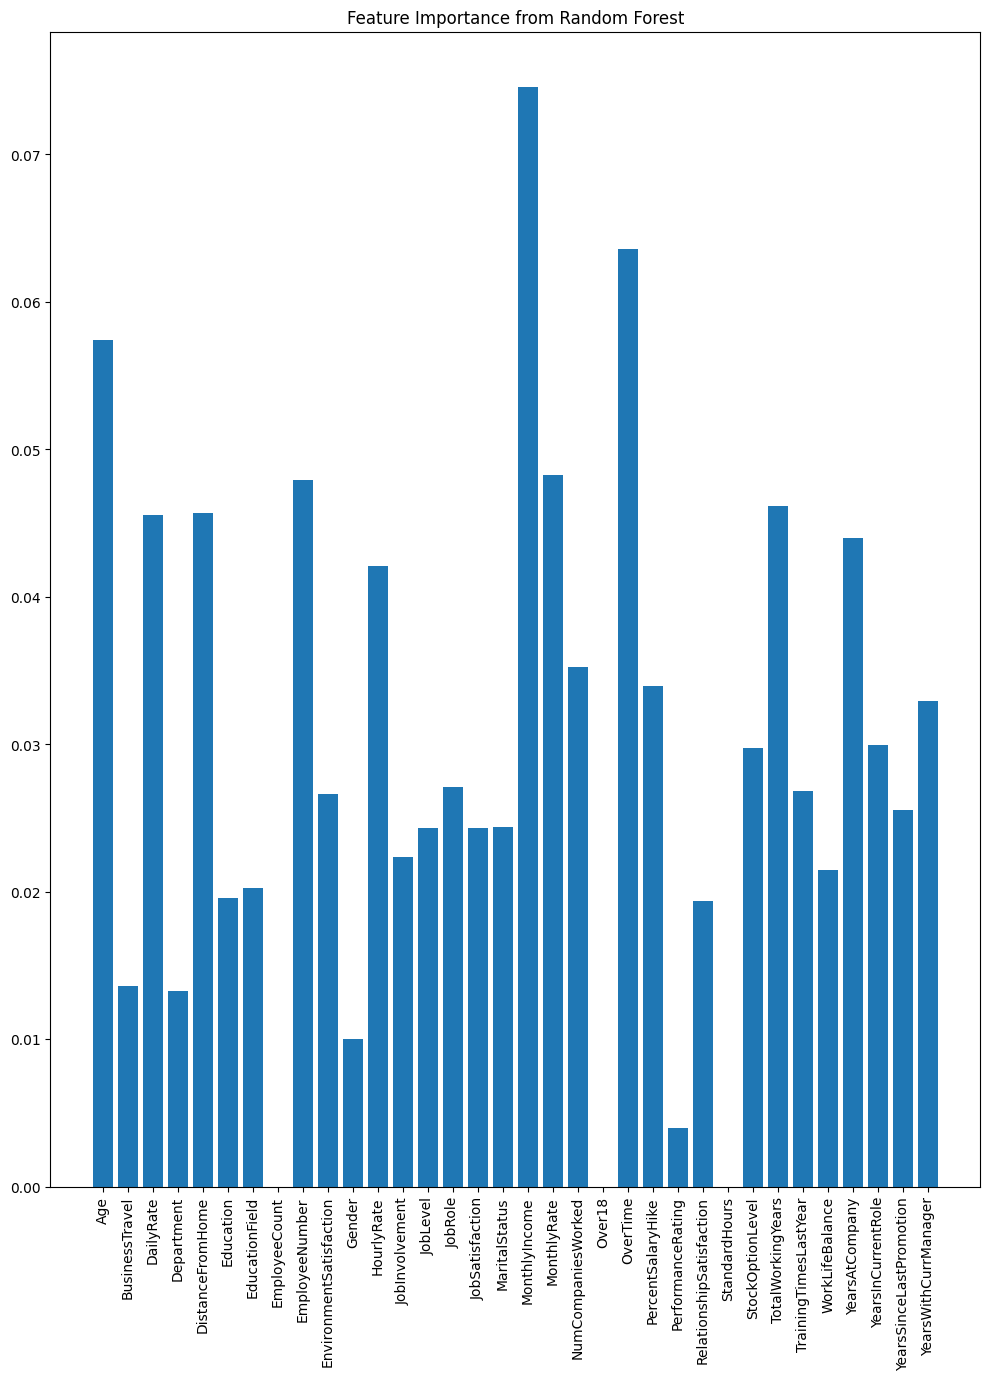

In [ ]:
plt.figure(figsize=(12, 15)) # Increased figsize for better visibility
plt.bar(range(len(rf_model.feature_importances_)), rf_model.feature_importances_)
plt.xticks(range(len(rf_model.feature_importances_)), x.columns, rotation=90)
plt.title("Feature Importance from Random Forest")
plt.show()

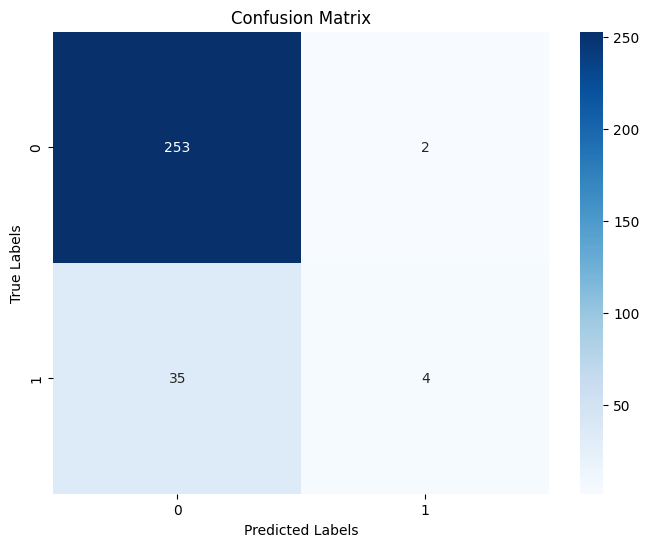

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



Silhouette Score: 0.4622069190458419


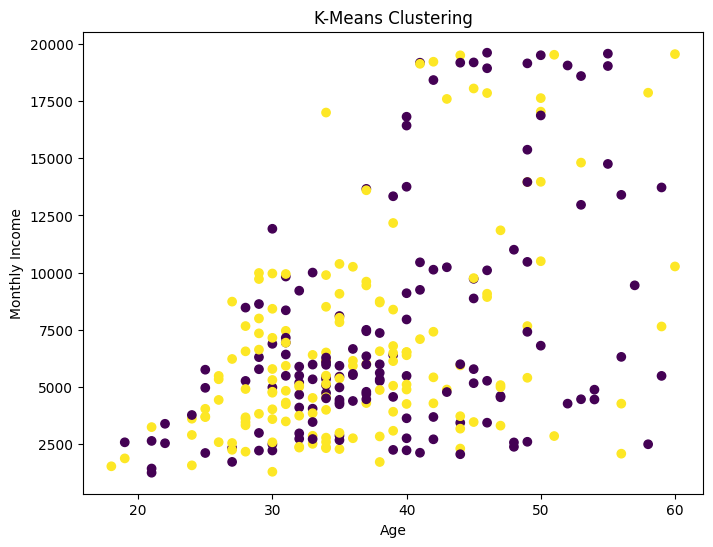

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

KMean = KMeans(n_clusters=2)
KMean.fit(x_train,y_train)
y_pred = KMean.predict(x_test)
silhouette_avg = silhouette_score(x_test, y_pred)
print("Silhouette Score:", silhouette_avg)

plt.figure(figsize=(8, 6))
plt.scatter(x_test['Age'], x_test['MonthlyIncome'], c=y_pred, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('K-Means Clustering')
plt.show()

DBSCAN found less than 2 clusters. Cannot compute Silhouette Score.
Unique labels found: {np.int64(-1)}


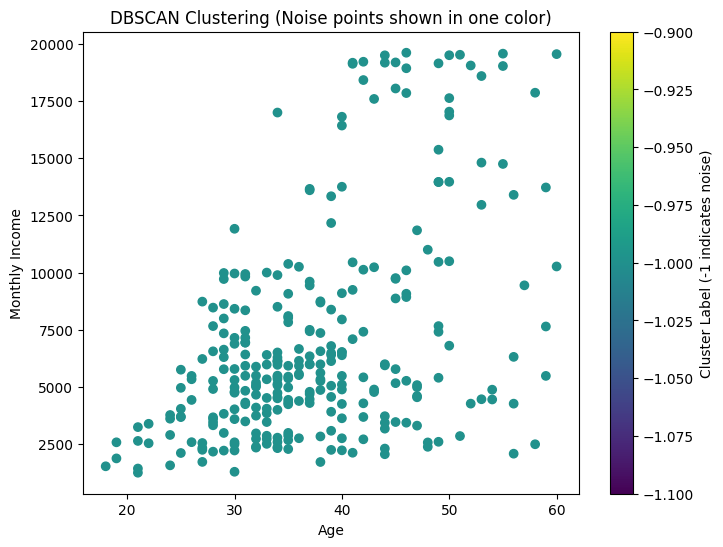

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Adjust DBSCAN parameters to potentially find more clusters
dbscan = DBSCAN(eps=1.5, min_samples=3 )
# For unsupervised learning, fit should only take X
dbscan.fit(x_train)
# fit_predict also usually only takes X
y_pred = dbscan.fit_predict(x_test)

# Check if y_pred has at least 2 unique labels before calculating silhouette score
if len(set(y_pred)) > 1:
    silhouette_avg = silhouette_score(x_test, y_pred)
    print("Silhouette Score:", silhouette_avg)
else:
    print("DBSCAN found less than 2 clusters. Cannot compute Silhouette Score.")
    print("Unique labels found:", set(y_pred))

plt.figure(figsize=(8, 6))
# If all points are noise (-1), they will appear as a single color.
# We will only plot 'Age' vs 'MonthlyIncome' for consistency with the KMeans plot.
# Note: x_test should be used for plotting if y_pred is derived from x_test
plt.scatter(x_test['Age'], x_test['MonthlyIncome'], c=y_pred, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('DBSCAN Clustering (Noise points shown in one color)')
plt.colorbar(label='Cluster Label (-1 indicates noise)')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8673469387755102


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test) # Corrected: call predict method to get predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8333333333333334


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)
roc_curve = roc_curve(y_test, y_pred)
auc_score = auc(roc_curve[0], roc_curve[1])
print("AUC Score:", auc_score)

Accuracy: 0.8537414965986394
Confusion Matrix:
 [[246   9]
 [ 34   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.36      0.13      0.19        39

    accuracy                           0.85       294
   macro avg       0.62      0.55      0.55       294
weighted avg       0.81      0.85      0.82       294

AUC Score: 0.5464555052790346


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)
roc_curve = roc_curve(y_test, y_pred)
auc_score = auc(roc_curve[0], roc_curve[1])
print("AUC Score:", auc_score)

Accuracy: 0.8809523809523809
Confusion Matrix:
 [[254   1]
 [ 34   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294

AUC Score: 0.5621417797888386


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
gb = gb_model.predict(x_test)
accuracy = accuracy_score(y_test, gb)
y_pred = gb
print("Accuracy:", accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)
roc_curve = roc_curve(y_test, y_pred)
auc_score = auc(roc_curve[0], roc_curve[1])
print("AUC Score:", auc_score)

Accuracy: 0.8877551020408163
Confusion Matrix:
 [[248   7]
 [ 26  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.65      0.33      0.44        39

    accuracy                           0.89       294
   macro avg       0.78      0.65      0.69       294
weighted avg       0.87      0.89      0.87       294

AUC Score: 0.6529411764705881


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr = lr_model.predict(x_test)
accuracy = accuracy_score(y_test, lr)
y_pred = lr
print("Accuracy:", accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)
roc_curve = roc_curve(y_test, y_pred)
auc_score = auc(roc_curve[0], roc_curve[1])
print("AUC Score:", auc_score)

Accuracy: 0.8673469387755102
Confusion Matrix:
 [[255   0]
 [ 39   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

AUC Score: 0.5


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

Decison_model = DecisionTreeClassifier()
Decison_model.fit(x_train, y_train)
dt = lr_model.predict(x_test)
accuracy = accuracy_score(y_test, dt)
print("Accuracy:", accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)
roc_curve = roc_curve(y_test, y_pred)
auc_score = auc(roc_curve[0], roc_curve[1])
print("AUC Score:", auc_score)

Accuracy: 0.8673469387755102
Confusion Matrix:
 [[255   0]
 [ 39   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

AUC Score: 0.5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
